In [98]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [99]:
# loading datasets into dataframe
df_ireland = pd.read_csv("HSM09.20230503130900.csv")
df_Germany = pd.read_csv("Germany-data1.csv")

In [100]:
# displaying the dataframe
df_ireland

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02196V02652,State,UNIT,VALUE
0,HSM09,House Construction Cost Index,1975M01,1975M01,-,State,Base Jan 1991=100,18.3
1,HSM09,House Construction Cost Index,1975M02,1975M02,-,State,Base Jan 1991=100,18.7
2,HSM09,House Construction Cost Index,1975M03,1975M03,-,State,Base Jan 1991=100,18.8
3,HSM09,House Construction Cost Index,1975M04,1975M04,-,State,Base Jan 1991=100,19.6
4,HSM09,House Construction Cost Index,1975M05,1975M05,-,State,Base Jan 1991=100,19.8
...,...,...,...,...,...,...,...,...
508,HSM09,House Construction Cost Index,2017M04,2017M04,-,State,Base Jan 1991=100,210.7
509,HSM09,House Construction Cost Index,2017M05,2017M05,-,State,Base Jan 1991=100,211.1
510,HSM09,House Construction Cost Index,2017M06,2017M06,-,State,Base Jan 1991=100,211.2
511,HSM09,House Construction Cost Index,2017M07,2017M07,-,State,Base Jan 1991=100,211.4


In [101]:
# replacing M with -
df_ireland['Month'] = df_ireland['Month'].str.replace('M', '-')

In [102]:
# show the dataframe
df_ireland

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02196V02652,State,UNIT,VALUE
0,HSM09,House Construction Cost Index,1975M01,1975-01,-,State,Base Jan 1991=100,18.3
1,HSM09,House Construction Cost Index,1975M02,1975-02,-,State,Base Jan 1991=100,18.7
2,HSM09,House Construction Cost Index,1975M03,1975-03,-,State,Base Jan 1991=100,18.8
3,HSM09,House Construction Cost Index,1975M04,1975-04,-,State,Base Jan 1991=100,19.6
4,HSM09,House Construction Cost Index,1975M05,1975-05,-,State,Base Jan 1991=100,19.8
...,...,...,...,...,...,...,...,...
508,HSM09,House Construction Cost Index,2017M04,2017-04,-,State,Base Jan 1991=100,210.7
509,HSM09,House Construction Cost Index,2017M05,2017-05,-,State,Base Jan 1991=100,211.1
510,HSM09,House Construction Cost Index,2017M06,2017-06,-,State,Base Jan 1991=100,211.2
511,HSM09,House Construction Cost Index,2017M07,2017-07,-,State,Base Jan 1991=100,211.4


In [103]:
#df_ireland = df_ireland[df_ireland['Month'] != '2007-O4']
# Replace '2007-O4' with NaN
#df_ireland['Month'] = df_ireland['Month'].replace('2007-O4', pd.NaT)

In [104]:
print(df_ireland.columns)

Index(['STATISTIC', 'STATISTIC Label', 'TLIST(M1)', 'Month', 'C02196V02652',
       'State', 'UNIT', 'VALUE'],
      dtype='object')


In [105]:
# remove '2007-O4' value
df_ireland = df_ireland[df_ireland['Month'] != '2007-O4']

In [106]:
#df_ireland['Month'] = df_ireland['Month'].str.replace('MO', '-')
df_ireland['Month'] = pd.to_datetime(df_ireland['Month'], format='%Y-%m')
df_ireland['Year'] = df_ireland['Month'].dt.year


C:\Users\chris\AppData\Local\Temp\ipykernel_8112\2764402531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Month'] = pd.to_datetime(df_ireland['Month'], format='%Y-%m')
C:\Users\chris\AppData\Local\Temp\ipykernel_8112\2764402531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Year'] = df_ireland['Month'].dt.year


In [107]:
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 512
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATISTIC        512 non-null    object        
 1   STATISTIC Label  512 non-null    object        
 2   TLIST(M1)        512 non-null    object        
 3   Month            512 non-null    datetime64[ns]
 4   C02196V02652     512 non-null    object        
 5   State            512 non-null    object        
 6   UNIT             512 non-null    object        
 7   VALUE            512 non-null    float64       
 8   Year             512 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 40.0+ KB


In [108]:
cols = df_ireland.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_ireland = df_ireland[cols]

In [109]:
# renaming the column
df_ireland=df_ireland.rename(columns={'VALUE': 'Cost-Ireland'})

In [110]:
# Sort the dataframe by year
df_ireland.sort_values(by='Year')

# Calculate annual percent change for Cost column
df_ireland['Annual%change'] = df_ireland['Cost-Ireland'].pct_change(periods=1)
df_ireland['Annual%change'] = (1 + df_ireland['Annual%change']).pow(12) - 1

In [111]:
# description of dataset
df_ireland.describe()

,Year,Cost-Ireland,Annual%change
count,512.000000,512.000000,511.000000
mean,1995.835938,126.052344,0.073622
std,12.329956,63.650513,0.230492
min,1975.000000,18.300000,-0.619872
25%,1985.000000,78.800000,0.000000
50%,1996.000000,115.900000,0.012759
75%,2006.250000,198.275000,0.059098
max,2017.000000,211.400000,2.769370


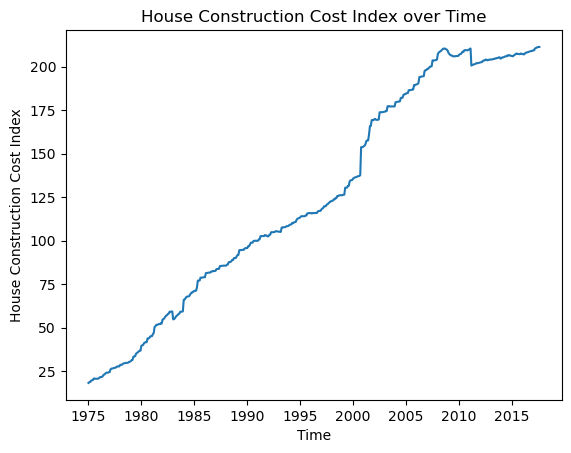

In [112]:
# Create a line plot
plt.plot(df_ireland['Month'], df_ireland['Cost-Ireland'])
plt.title('House Construction Cost Index over Time')
plt.xlabel('Time')
plt.ylabel('House Construction Cost Index')
plt.show()

In [113]:
df_ireland = df_ireland.groupby('Year').mean()

In [114]:
# resetting of dataframe
df_ireland = df_ireland.reset_index()


In [115]:
df_ireland = df_ireland[(df_ireland['Year'] >= 2001) & (df_ireland['Year'] <= 2017)][['Year', 'Cost-Ireland', 'Annual%change']]


In [116]:
#show the dataframe
df_ireland.head()

,Year,Cost-Ireland,Annual%change
26,2001,161.525000,0.107842
27,2002,171.808333,0.031872
28,2003,176.525000,0.019312
29,2004,181.508333,0.041152
30,2005,186.933333,0.031169


In [117]:
# checking for null values

df_ireland.isnull()

,Year,Cost-Ireland,Annual%change
26,False,False,False
27,False,False,False
28,False,False,False
29,False,False,False
30,False,False,False
31,False,False,False
32,False,False,False
33,False,False,False
34,False,False,False
35,False,False,False


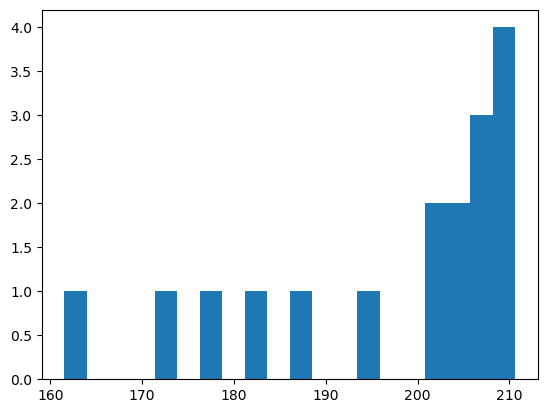

In [118]:
# plot a histogram to visualize the distribution
plt.hist(df_ireland['Cost-Ireland'], bins=20)
plt.show()

In [119]:
# perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
stat, p = shapiro(df_ireland['Cost-Ireland'])
                             
print('Shapiro-Wilk test: statistic = {:.3f}, p-value = {:.3f}'.format(stat, p))
if p > 0.05:
    print('df_ireland is normally distributed')
else:
    print('df_ireland is not normally distributed')

Shapiro-Wilk test: statistic = 0.818, p-value = 0.004
df_ireland is not normally distributed


# The Shapiro-Wilk test on df_ireland resulted in a p-value less than 0.05, indicating that the data is not normally distributed.

The above tells us that parametric tests are not suitable for the dataset meaning non-parametric tests is better to use methods analysis the data


# Germany Dataset

In [120]:
#show head of the dataset
df_Germany.head()

,Unnamed: 0,buildings/construction measures(Number),Building(Number),volume(1000 cbm),construction measures(Number),floor space(1000 sqm),Apartments(Number),living space of the apartments(1000 sqm),Other residential units(Number),Living space of the other residential units(1000 sqm),...,Building(Number).2,volume(1000 cbm).2,construction measures(Number).2,floor space(1000 sqm).1,Apartments(Number).2,living space of the apartments(1000 sqm).2,Other residential units(Number).2,Living space of the other residential units(1000 sqm).2,living rooms(\tNumber).1,Estimated cost of construction(Thousand EUR).2
0,2001,289794,-,-,-,47286,290978,33846,3980,148,...,-,-,88682,4151,28941,4488,196,22,173421,12902204
1,2002,278340,-,-,-,40711,274117,32694,5090,170,...,-,-,82951,3269,25706,4140,-123,9,156936,11563476
2,2003,298787,-,-,-,38251,296823,36050,4881,134,...,-,-,86453,2641,29247,4616,-161,-3,178425,11581967
3,2004,271944,-,-,-,35491,268679,32490,6779,225,...,-,-,83495,2654,28247,4487,210,20,171943,10764582
4,2005,242123,-,-,-,34256,240571,28807,6997,218,...,-,-,73094,3105,25265,3786,-50,14,143163,9983634


In [121]:

# information of the dataset
df_Germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               776 non-null    object 
 1   buildings/construction measures(Number)                  735 non-null    object 
 2   Building(Number)                                         735 non-null    object 
 3   volume(1000 cbm)                                         735 non-null    object 
 4   construction measures(Number)                            735 non-null    object 
 5   floor space(1000 sqm)                                    735 non-null    object 
 6   Apartments(Number)                                       735 non-null    object 
 7   living space of the apartments(1000 sqm)                 735 non-null    object 
 8   Other residential units(Number

In [122]:
# renaming of the columns 
df_Germany = df_Germany.rename(columns={'Unnamed: 0': 'Year','Estimated cost of construction(Thousand EUR).2':'cost-Germany'})


In [123]:
df_Germany = df_Germany[['Year', 'cost-Germany']]

In [124]:
# converting column to int 
df_Germany['cost-Germany'] = pd.to_numeric(df_Germany['cost-Germany'], errors='coerce')
# subset of columns where missing values will be dropping using  dropna 
df_Germany = df_Germany.dropna(subset=['cost-Germany'])
df_Germany['Annual%change'] = df_Germany['cost-Germany'].pct_change(periods=1)
df_Germany['Annual%change'] = (1 + df_Germany['Annual%change']).pow(12) - 1

In [125]:
#converting year to datatype int
df_Germany['Year'] = df_Germany['Year'].astype(int)

In [126]:
df_Germany = df_Germany[df_Germany['Year'].between(2001, 2017)][['Year', 'cost-Germany', 'Annual%change']]


In [127]:
#the displaying the dataset
df_Germany.head()

,Year,cost-Germany,Annual%change
0,2001,12902204.0,NaN
1,2002,11563476.0,-0.731407
2,2003,11581967.0,0.019359
3,2004,10764582.0,-0.584493
4,2005,9983634.0,-0.594960


In [128]:
# description of dataset
df_Germany.describe()

,Year,cost-Germany,Annual%change
count,527.000000,5.270000e+02,5.260000e+02
mean,2009.000000,2.057982e+06,1.099064e+17
std,4.903634,2.665463e+06,2.520670e+18
min,2001.000000,1.990200e+04,-1.000000e+00
25%,2005.000000,3.157795e+05,-6.335873e-01
50%,2009.000000,1.096080e+06,3.337040e-01
75%,2013.000000,2.805948e+06,2.239260e+00
max,2017.000000,1.686589e+07,5.781078e+19


In [129]:
# the shape of the dataset
df_Germany.shape

(527, 3)

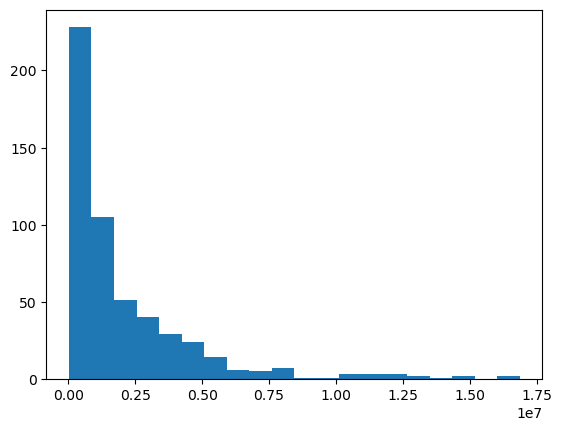

In [130]:
# plot a histogram to visualize the distribution
plt.hist(df_Germany['cost-Germany'], bins=20)
plt.show()

# Positive skewness indicates that the data are skewed to the right, meaning there are more extreme values on the right side of the distribution

In [131]:
# perform Shapiro-Wilk test for normality

stat, p = shapiro(df_Germany['cost-Germany'])
                             
print('Shapiro-Wilk test: statistic = {:.3f}, p-value = {:.3f}'.format(stat, p))
if p > 0.05:
    print('df_Germany is normally distributed')
else:
    print('df_Germany is not normally distributed')

Shapiro-Wilk test: statistic = 0.707, p-value = 0.000
df_Germany is not normally distributed


In [132]:
# perform Shapiro-Wilk test for normality

stat, p = shapiro(df_ireland['Cost-Ireland'])
                             
print('Shapiro-Wilk test: statistic = {:.3f}, p-value = {:.3f}'.format(stat, p))
if p > 0.05:
    print('df_Germany is normally distributed')
else:
    print('df_Germany is not normally distributed')

Shapiro-Wilk test: statistic = 0.818, p-value = 0.004
df_Germany is not normally distributed


# Analyse the Ireland and Germany Construction Cost

#the cost of living in Ireland increased sharply between 1979 and 1982, and again between 2001 and 2004. The cost of living in Germany, on the other hand, increased sharply between 1978 and 1982, and again between 1992 and 1995.

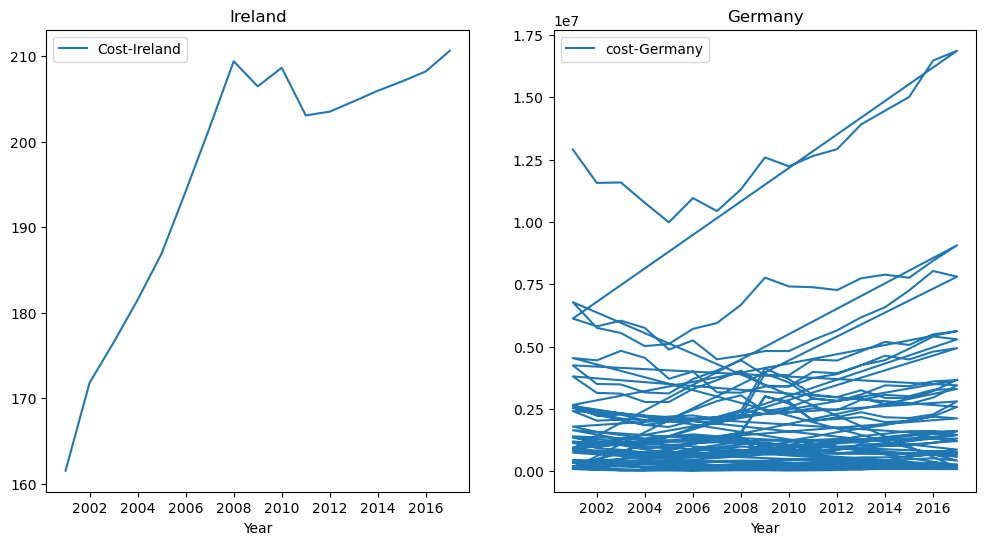

In [133]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
df_ireland.plot(x='Year', y='Cost-Ireland', ax=ax1)
ax1.set_title('Ireland')
df_Germany.plot(x='Year', y='cost-Germany', ax=ax2)
ax2.set_title('Germany')
plt.show()

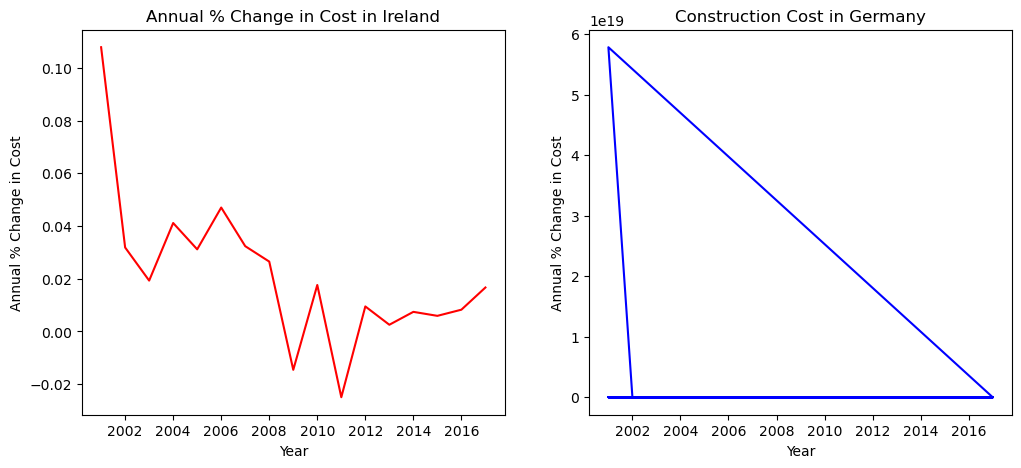

In [134]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Line plot for Ireland
ax1.plot(df_ireland['Year'], df_ireland['Annual%change'], color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Annual % Change in Cost')
ax1.set_title('Annual % Change in Cost in Ireland')

# Line plot for Germany
ax2.plot(df_Germany['Year'], df_Germany['Annual%change'], color='blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Annual % Change in Cost')
ax2.set_title('Construction Cost in Germany')

plt.show()

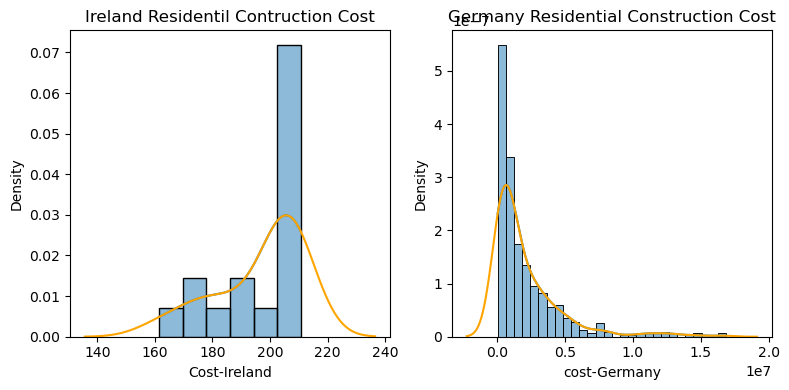

In [135]:
fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
sns.histplot(df_ireland["Cost-Ireland"], kde=True, stat="density")
sns.kdeplot(df_ireland["Cost-Ireland"], color="orange")
plt.title("Ireland Residentil Contruction Cost")

plt.subplot(1,2,2)
sns.histplot(df_Germany["cost-Germany"], kde=True, stat="density")
sns.kdeplot(df_Germany["cost-Germany"], color="orange")
plt.title("Germany Residential Construction Cost")

plt.tight_layout()

#plt.savefig(f"data/pictures/figure2.png") # Population Normal distribution
plt.show()
        

In [136]:
df_ireland[df_ireland["Annual%change"]<0][["Year", "Cost-Ireland","Annual%change"]]

,Year,Cost-Ireland,Annual%change
34,2009,206.483333,-0.014543
36,2011,203.083333,-0.024934


# Average and variance

In [137]:
# Ireland Cost average
int(df_ireland["Cost-Ireland"].mean())

196

In [138]:
# Ireland Cost variance
int(df_ireland["Cost-Ireland"].var())

230

In [139]:
# Ireland Cost std
int(df_ireland["Cost-Ireland"].std())

15

In [140]:
# Germany Cost average
int(df_Germany["cost-Germany"].mean())

2057981

In [141]:
# Germany Cost variance
int(df_Germany["cost-Germany"].var())

7104694783805

In [142]:
# Germany Cost std
int(df_Germany["cost-Germany"].std())

2665463

# Average rate : Average of (Germany Construction Cost/Ireland Construction Cost)

In [143]:
import numpy as np

# Calculate the average rate
avg_rate = np.mean(df_Germany['cost-Germany'] / df_ireland['Cost-Ireland'])

print("Average rate: {:.2f}".format(avg_rate))

Average rate: 30520.20


# Non-Parametric Techniques:

# Spearman's rank correlation coefficient: Ireland and Germany

In [144]:
tmp = pd.merge(df_ireland[["Year", "Cost-Ireland"]], df_Germany[["Year", "cost-Germany"]], on="Year", how="left")
tmp.columns = ["Year", "Cost-Ireland", "cost-Germany"]

In [145]:
r, p = stats.pearsonr(tmp["Cost-Ireland"], tmp["cost-Germany"])
print("correlation coefficient: ", r)
print("p value: ", p)

correlation coefficient:  0.06798664573146118
p value:  0.11903611108589132


# Mann-Whitney U test:Ireland and Germany

In [146]:
u_stat, p_val = stats.mannwhitneyu(df_ireland["Cost-Ireland"], df_Germany["cost-Germany"])
print("Mann-Whitney U test statistic: ", u_stat)
print("p-value: ", p_val)

Mann-Whitney U test statistic:  0.0
p-value:  2.1914937077887182e-12


# Wilcoxon : Ireland and Germany

In [147]:
stat, p = stats.ranksums(df_ireland["Cost-Ireland"], df_Germany["cost-Germany"])
print("statistic: ", stat)
print("p value: ", p)

statistic:  -7.022506413687012
p value:  2.179229971586791e-12


# Chi-squared test : Ireland and Germany

In [148]:
# contingency table
cont_table = pd.crosstab(index=df_ireland["Cost-Ireland"], columns=df_Germany["cost-Germany"])

# conduct chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(cont_table)


In [149]:
print("Chi-squared test results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared test results:
Chi-squared statistic: 132.0
P-value: 0.23290755488982084
Degrees of freedom: 121
Expected frequencies:
[[0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
 [0.08333333 0.08333333 0.08333333 0.08333333 0.

#Based on the results of a p-value of 0.2330, we would fail to reject the null hypothesis at a significance level of 0.05 (assuming that is the chosen significance level)

# ANOVA : Test between Germany and Ireland

In [150]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Perform ANOVA
formula = 'Cost_Ireland ~ cost_Germany'
data = pd.concat([df_ireland['Cost-Ireland'], df_Germany['cost-Germany']], axis=1)
data.columns = ['Cost_Ireland', 'cost_Germany']

In [151]:
model = ols(formula, data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

In [152]:
# Print ANOVA table
print(aov_table)

                   sum_sq    df          F   PR(>F)
cost_Germany  1542.404622   1.0  11.738467  0.00648
Residual      1313.974475  10.0        NaN      NaN


#From the ANOVA table, with a p-value of 0.00648, The null hypothesis will be rejected at a significance level of 0.05 . 
This s to suggests that there is a significant effect of the variable 'cost_Germany' on the dependent variable 'Cost_Ireland.'

# F-test : Ireland and Germany

In [153]:
from scipy.stats import f_oneway

In [154]:
# Perform F-test
f_statistic, p_value = f_oneway(df_ireland["Cost-Ireland"], df_Germany["cost-Germany"])

In [155]:
# Print results
print("F-statistic: ", f_statistic)
print("p-value: ", p_value)

F-statistic:  10.114135242155854
p-value:  0.0015554901032557933


#The null hypothesis for the F-test is that the means of the two populations are equal. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the two populations.

In this case, the p-value is less than 0.05, so we can conclude that there is a significant difference in cost between Ireland and Germany.

# Kruskal-Wallis test : Ireland and Germany

In [156]:
from scipy.stats import kruskal
# create two sample groups
grp1 = df_ireland['Cost-Ireland']
grp2 = df_Germany['cost-Germany']

In [157]:
# perform Kruskal-Wallis test
stat, p = kruskal(grp1, grp2)

In [158]:
# print results
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Statistics=49.316, p=0.000
Probably different distributions


#from the obtained from results of the Kruskal-Wallis test. meaning the null hypothesis will be rejected with a p-value of 0.000 at a significance level of 0.05 which means that  distributions of the two group differ so much 

In [159]:
# perform two-sample t-test

t_test = stats.ttest_ind(df_ireland["Cost-Ireland"], df_Germany["cost-Germany"], axis=0, equal_var=True, nan_policy='propagate')
print(t_test)

Ttest_indResult(statistic=-3.1802728251135703, pvalue=0.0015554901032558955)


In [ ]:
# based on result , we reject the null hypothesis at a significance level of 0.05 of a p-value of 0.00155